In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
tf.device("GPU:1")

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5380,ham,Its sunny in california. The weather's just cool,NaN,NaN,NaN
5135,ham,Sorry * was at the grocers.,NaN,NaN,NaN
5350,ham,No one interested. May be some business plan.,NaN,NaN,NaN
885,ham,Gibbs unsold.mike hussey,NaN,NaN,NaN
3084,ham,In da car park,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], inplace=True)
df.sample(5)

,v1,v2
3118,ham,Stop knowing me so well!
1246,ham,"I do know what u mean, is the king of not hav..."
413,ham,Bring home some Wendy =D
3574,ham,And do you have any one that can teach me how ...
1480,ham,Have you always been saying welp?


In [7]:
# Renameing the columns
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
df.sample(5)

,target,text
3872,ham,"Happy or sad , one thing about past is- \Its n..."
2640,ham,Pandy joined 4w technologies today.he got job..
4312,ham,"I wasn't well babe, i have swollen glands at m..."
1243,ham,No shoot me. I'm in the docs waiting room. :/
2316,ham,That's cause your old. I live to be high.


In [8]:
# we need numbers in the target column so we need label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["target"] = encoder.fit_transform(df["target"])

In [10]:
df.head()  # Values are converted from ham and spam into 0 and 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# checking duplicates
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

## 2.EDA

Understanding our Data

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [17]:
import matplotlib.pyplot as plt

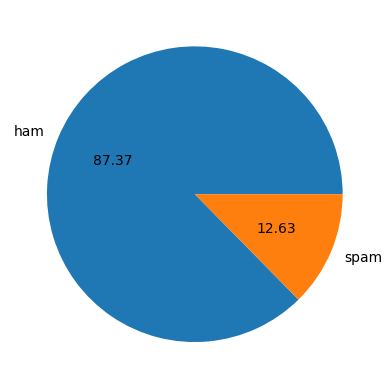

In [18]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")  # autopct = for percentage of the division in pi chart
plt.show()

In [19]:
# Data is imbalanced
# so in order to understand the messages deeply, we create 3 columns(no. of chars, no. of words, no. of lines) in the sms
# for that we need a library "nltk" natural language toolkit library
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download("punkt")  # a dependency of nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Adding column num_characters
df["num_characters"] = df["text"].apply(len)   # apply = pandas function

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# Adding column num_words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# Adding column num_sentences
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
# gives the statistical summary, of the complete dataset
df[["num_characters","num_words","num_sentences"]].describe()   

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# Describe function for HAM messages
df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()   

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# Describe function for SPAM messages
df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe() 

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

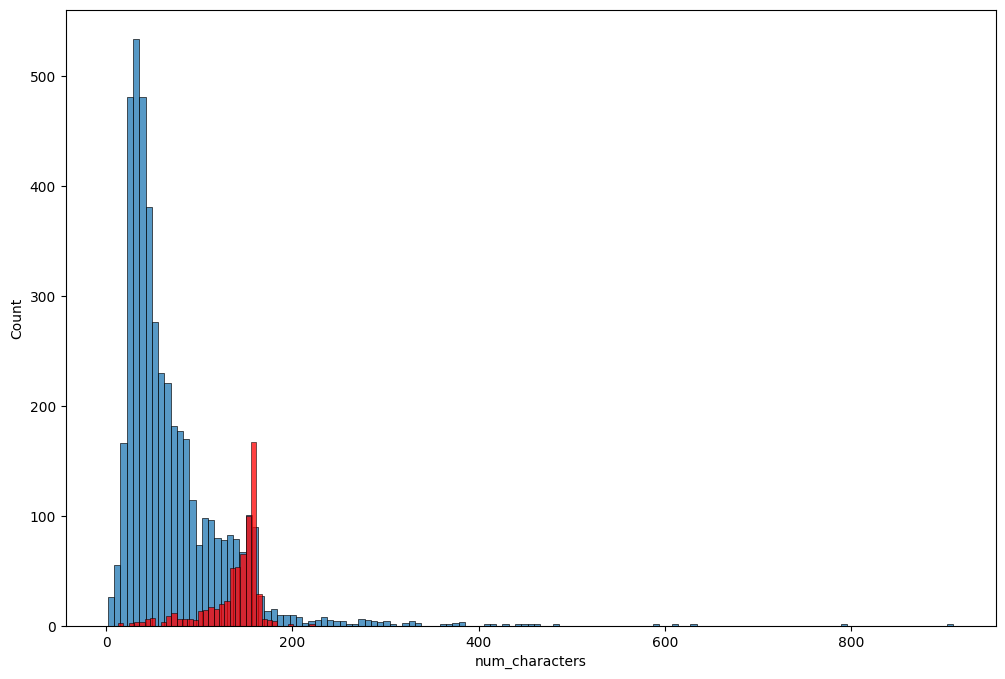

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

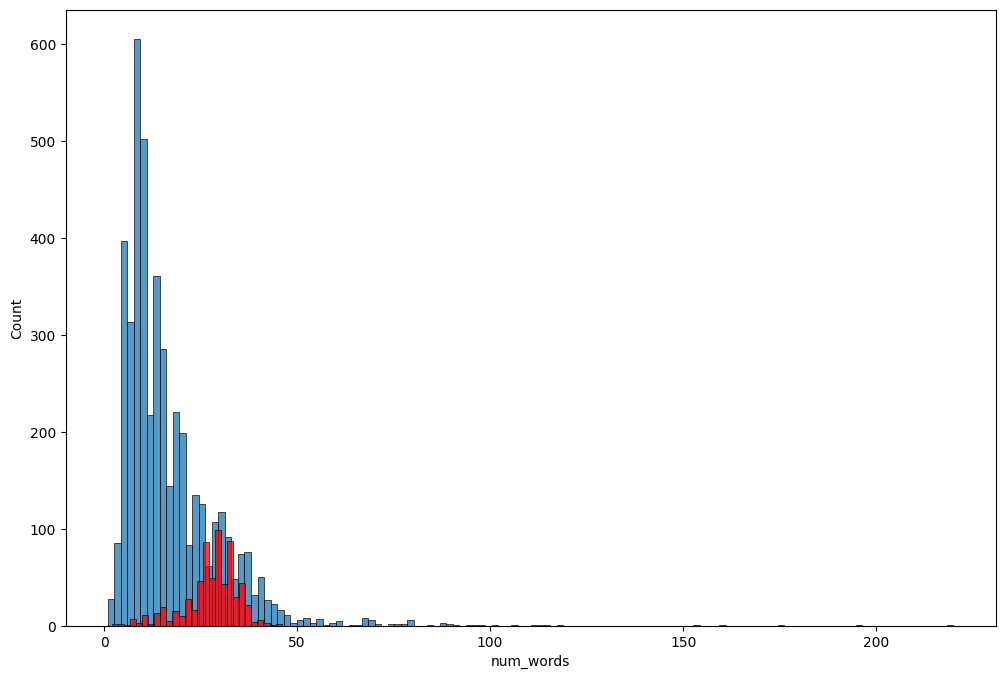

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

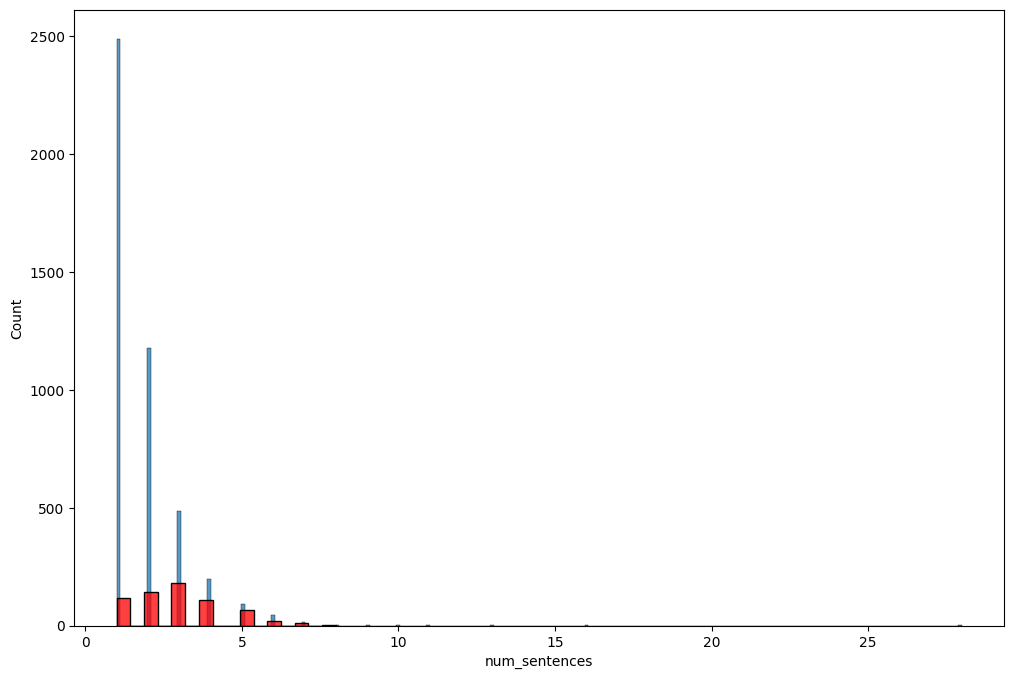

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_sentences"])
sns.histplot(df[df["target"] == 1]["num_sentences"], color="red")

So from the above analysis we got to know that the number of characteers are more in SPAM messages than in HAM messages.

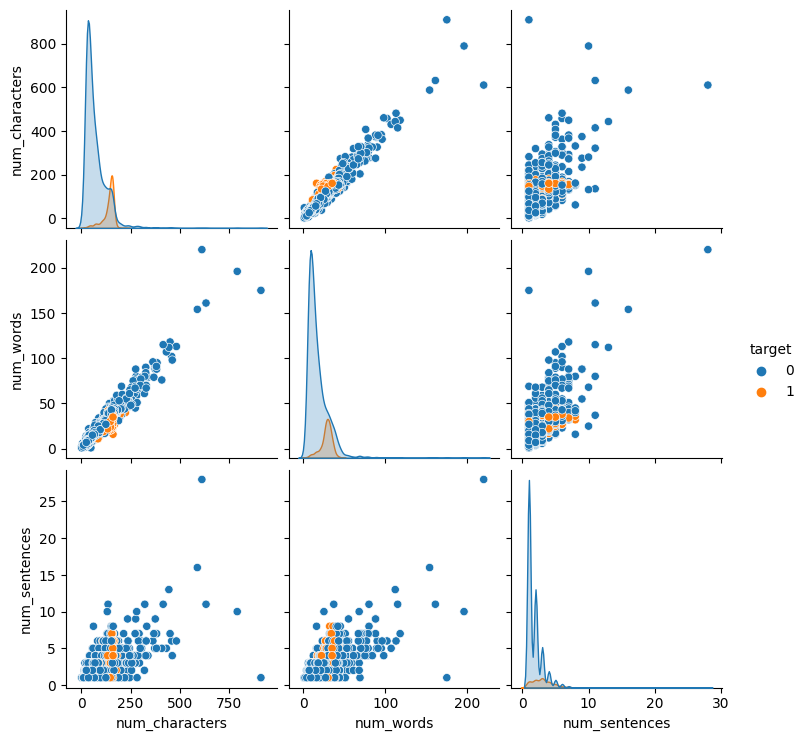

In [36]:
 # hue = determines which column in the data frame should be used for colour encoding.
sns.pairplot(df, hue="target") 

In [37]:
# Corelation - gives the relationship between each column of the dataset to every other column in the dataset
df.corr()

C:\Users\shman\AppData\Local\Temp\ipykernel_14344\716446165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<ipython-input-41-8fdfd0c2c7d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)  # annot = prints the annotations or numbers on the heatmap


<Axes: >

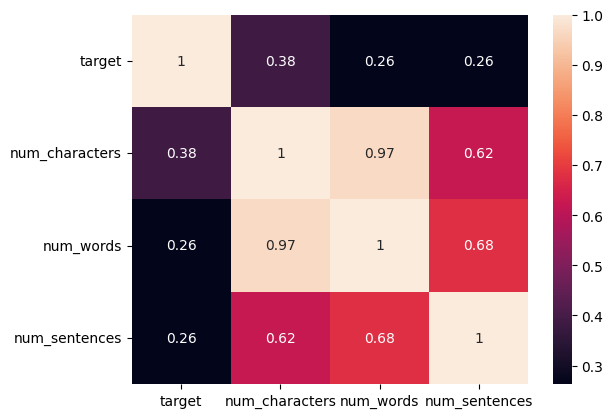

In [ ]:
sns.heatmap(df.corr(), annot=True)  # annot = prints the annotations or numbers on the heatmap

From the above heatMap, we will keep only the "num_character" column because it has 0.38 corelation with target and the targe=1, which means the difference is more when compared with "num_words","num_sentences" with target variable.

## 3. Data Preprocessing 

* Lower Case
* Tokenization
* Removing Special Characters
* Removing Stopwords and penctuation
* Stemming

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
def text_transform(text):
    
    #Converting into Lower Case
    text = text.lower()
    
    # String Tokenization
    text = nltk.word_tokenize(text)

    # Removing Special Characters
    y = []
    for i in text:
        if i.isalnum():  # isalnum() - checks wether the character is alphanumeeric or not
            y.append(i)
            
    # Removing Stopwords and penctuation-> stop words are the words which help us to build sentences (eg:- is, the, and)
    # from nltk.corpus import stopwords
    # nltk.download('stopwords')
    # stopwords.words("english")
    text = y[:]  # ":" -> clones the list y
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english"):
            y.append(i)
            
    # Stemming -> converts (eg: Dancing to Danc, Loving to Love, etc)
    # from nltk.stem.porter import PorterStemmer
    # ps = PorterStemmer()
    # ps.stem("loving")
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)  # returns in the form of string

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")  # THESE ARE THE STOPWORDS IN ENGLISH

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
# SAMPLE
text_transform("You call him and tell now infront of them. Call him now.")

'call tell infront call'

In [42]:
# SAMPLE
text_transform("Good Luck! Draw takes place 28th Feb 06. Good Luck! For removal send STOP to 87239 customer services 08708034412")

'good luck draw take place 28th feb good luck remov send stop 87239 custom servic 08708034412'

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
# Applying text_transform to the text column and store it into a new column
df["transformed_text"] = df["text"].apply(text_transform)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we havee to see the word cloud of both ham and spam messages, to understand which word has been used more times

In [48]:
from wordcloud import WordCloud

In [49]:
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color = "white")
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

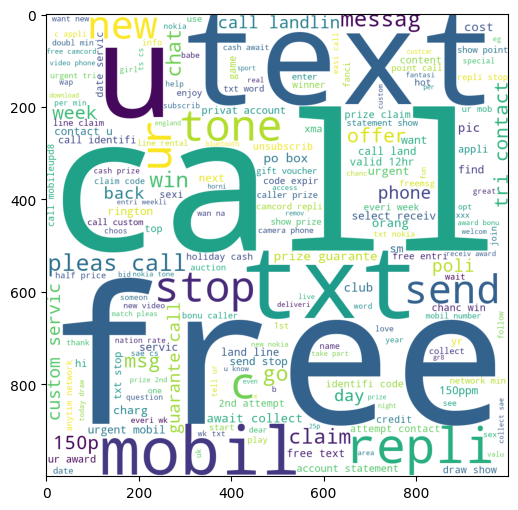

In [50]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

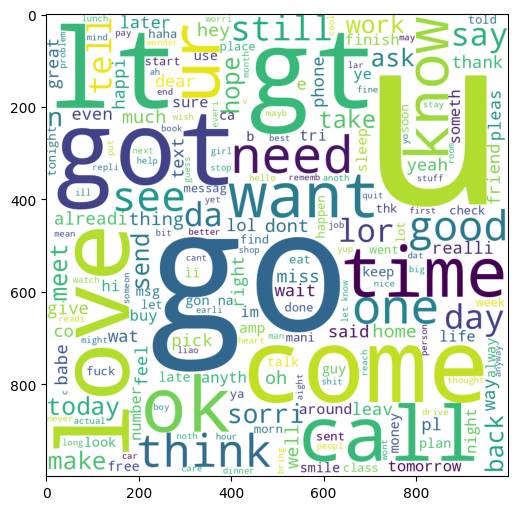

In [ ]:
plt.figure(figsize=(15, 6))
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [53]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [54]:
from collections import Counter   # counter converts list to dictionary

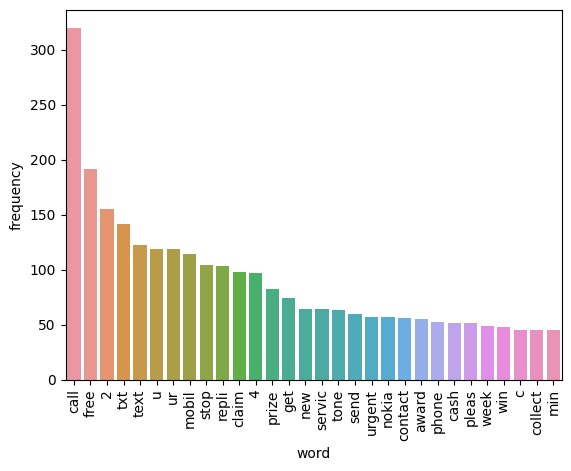

In [55]:
spam_counter = Counter(spam_corpus)
spam_top_words = pd.DataFrame(spam_counter.most_common(30), columns=['word', 'frequency'])

sns.barplot(x='word', y='frequency', data=spam_top_words)
plt.xticks(rotation="vertical")
plt.show()

In [56]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

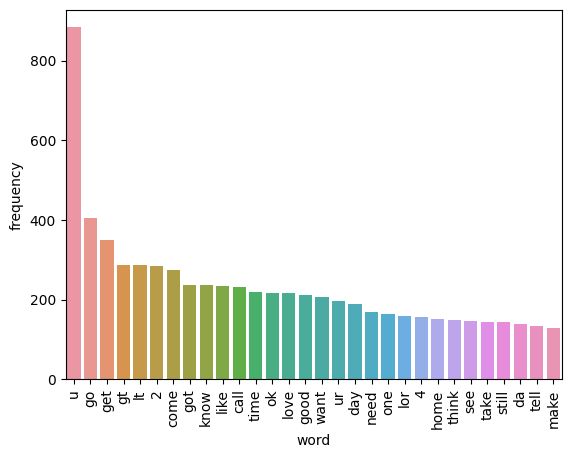

In [57]:
ham_counter = Counter(ham_corpus)
ham_top_words = pd.DataFrame(ham_counter.most_common(30), columns=['word', 'frequency'])

sns.barplot(x='word', y='frequency', data=ham_top_words)
plt.xticks(rotation="vertical")
plt.show()

## 4. Model Development

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [60]:
X.shape  #(no._of_sentences, no._of_words)

(5169, 3000)

In [61]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
y = df["target"].values

In [63]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print("x_train and y_train size are :", x_train.shape,y_train.shape)
print("x_test and y_test size are :", x_test.shape,y_test.shape)

x_train and y_train size are : (4135, 3000) (4135,)
x_test and y_test size are : (1034, 3000) (1034,)


In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(x_train, y_train)

y_pred1 = gnb.predict(x_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred1))
print("Accuracy score: ", confusion_matrix(y_test, y_pred1))
print("Accuracy score: ", precision_score(y_test, y_pred1))

Accuracy score:  0.8694390715667312
Accuracy score:  [[788 108]
 [ 27 111]]
Accuracy score:  0.5068493150684932


In [69]:
mnb.fit(x_train, y_train)

y_pred2 = mnb.predict(x_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred2))
print("Accuracy score: ", confusion_matrix(y_test, y_pred2))
print("Accuracy score: ", precision_score(y_test, y_pred2))

Accuracy score:  0.9709864603481625
Accuracy score:  [[896   0]
 [ 30 108]]
Accuracy score:  1.0


In [70]:
bnb.fit(x_train, y_train)

y_pred3 = bnb.predict(x_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred3))
print("Accuracy score: ", confusion_matrix(y_test, y_pred3))
print("Accuracy score: ", precision_score(y_test, y_pred3))

Accuracy score:  0.9835589941972921
Accuracy score:  [[895   1]
 [ 16 122]]
Accuracy score:  0.991869918699187


In [71]:
import pickle

In [72]:
# As mnb is giving maximum precession, we can go with mnb
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))